This notebook contains the tutorial for DCIT 405 Statistical Models for Data Science

# Chapter One: Exploratory Data Analysis

In [17]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import trim_mean
import wquantiles

In [4]:
# define data path
DATA_PATH = r'C:\Users\user\Downloads\statiscal_models_for_data_science'

state = pd.read_csv(os.path.join(DATA_PATH, 'state.csv'))

print(state.head())

        State  Population  Murder.Rate Abbreviation
0     Alabama     4779736          5.7           AL
1      Alaska      710231          5.6           AK
2     Arizona     6392017          4.7           AZ
3    Arkansas     2915918          5.6           AR
4  California    37253956          4.4           CA


In [6]:
# Find the population mean
pop_mean = state['Population'].mean()
pop_mean_trimmed = trim_mean(state['Population'], 0.1) # Using the trimmed mean to account for outliers
pop_median = state['Population'].median()


print(f"Population mean:{pop_mean}")
print(f"Population mean trimmed:{pop_mean_trimmed}")
print(f"Population mean:{pop_median}")

Population mean:6162876.3
Population mean trimmed:4783697.125
Population mean:4436369.5


##  Key Ideas
- The basic metric for location is the mean, but it can be sensitive to extreme
values (outlier).

- Other metrics (median, trimmed mean) are less sensitive to outliers and unusual
distributions and hence are more robust.

Since the mean for the population are different. We need to account this for other variable in the data

In [13]:
# Apply Weighted Mean
weighted_mean = np.average(state['Murder.Rate'], weights= state['Population'])
weighted_median = wquantiles.median(state['Murder.Rate'], weights= state['Population'])

print(f"Weighted Mean:{weighted_mean}")
print(f"Weighted Median:{weighted_median}")

Weighted Mean:4.445833981123393
Weighted Median:4.4


# Statistics Of Variability

Next we want to check how the data is spread. We can use the Variance which is the average of distances from the mean squared. The next is standard deviation which is the square root of the variance. The last is the interquantile range which is the difference between the third quantile and the first quantile

In [15]:
# standard deviation
std = state['Population'].std()
iqr = np.quantile(state['Population'], 0.75) - np.quantile(state['Population'], 0.25)

print('std:', std, 'iqr:', iqr)

std: 6848235.347401142 iqr: 4847308.0


# Exploring the Data Distribution

- boxplots

C:\Users\user\AppData\Local\Temp\ipykernel_16572\274193883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


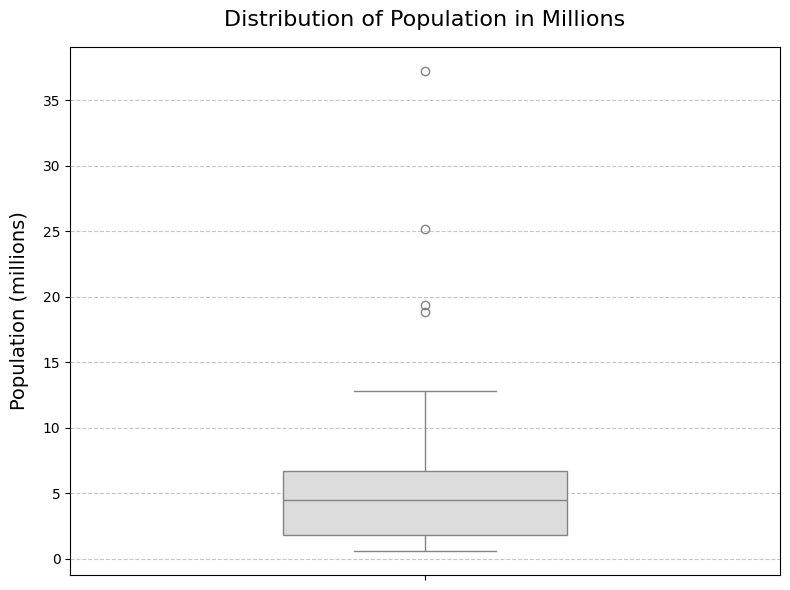

In [25]:
# Set figure size
plt.figure(figsize=(8, 6))

# Create boxplot with values divided by 1,000,000
sns.boxplot(
    y=state['Population'] / 1_000_000,
    width=0.4,  
    palette="coolwarm"
)

# Customize labels and title
plt.ylabel('Population (millions)', fontsize=14, labelpad=10)
plt.title('Distribution of Population in Millions', fontsize=16, pad=15)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout() 
plt.show()


- Frequency Table

In [31]:
binnedPopulation = pd.cut(state['Population'], bins= 10)

print(binnedPopulation.value_counts())

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64
